<a href="https://colab.research.google.com/github/Yeon-Jun-Kim/YJ---Git/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/%ED%96%84%EB%B2%A0%EC%9D%B4%EC%BB%A8%2C%EC%86%8C%EA%B3%A0%EA%B8%B0_%ED%96%84%EB%B2%84%EA%B1%B0_%EA%B0%80%EA%B2%A9_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.21.6
1.3.5
2.8.2


In [2]:
from google.colab import files
uploaded = files.upload()
#data = 'lab01_test_score.csv'

Saving ECOS_TABLE_20220410_155621.xlsx to ECOS_TABLE_20220410_155621.xlsx


In [3]:
data = pd.read_excel('ECOS_TABLE_20220410_155621.xlsx', sheet_name='Sheet1')
data.head() # 헤드가 없을때 헤드를 부여
#data.tail()

,cow,ham,hamburber
0,94.710,97.224,94.519
1,92.434,95.261,94.519
2,92.449,95.680,94.519
3,94.178,94.878,95.563
4,94.553,96.350,98.070


In [4]:
print(data.info()) #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cow        19 non-null     float64
 1   ham        19 non-null     float64
 2   hamburber  19 non-null     float64
dtypes: float64(3)
memory usage: 584.0 bytes
None


In [5]:
print(data.describe())

              cow         ham   hamburber
count   19.000000   19.000000   19.000000
mean    97.802158   98.183105   99.526053
std      3.981016    3.199608    3.187875
min     92.434000   94.201000   94.519000
25%     94.407000   95.774500   98.035000
50%     97.340000   97.587000   99.557000
75%    100.175500   99.805000  101.196000
max    108.320000  106.130000  105.720000


In [6]:
print(data.isnull().sum())

cow          0
ham          0
hamburber    0
dtype: int64


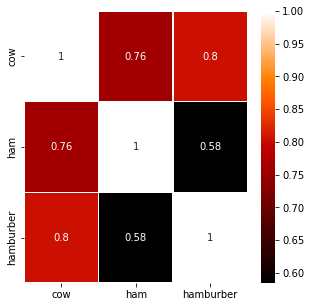

In [7]:
# graph for correlation
colormap = plt.cm.gist_heat # 색상구성
plt.figure(figsize=(5,5))

import seaborn as sns
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, cmap=colormap, linecolor='white', annot=True) # vmax=1.0로 지정해 1.0에 가까울 수록 밝은 색으로 표시
plt.show()

KeyError: ignored

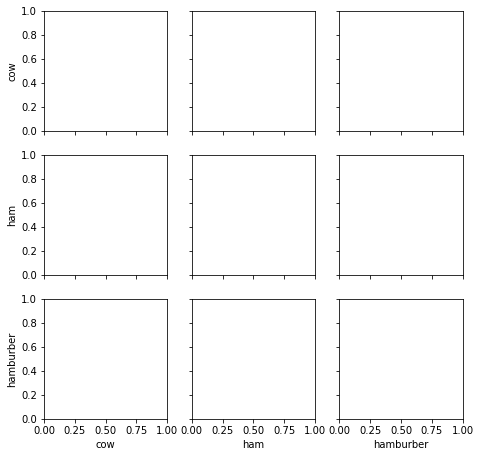

In [8]:
sns.pairplot(data, hue='final');
plt.show()

In [10]:
data = data.values # 숫자만 핸들링 하기 위해 지정
x_train = data[:, 0:2] # 2번째 데이터 까지 2차원 그래프로 그리기 위해서
y_train = data[:, [2]] # y 는 마지막 데이터를 의미  
x_train = np.array(x_train, dtype=np.float32) # 실수 32 체계로 바꾸겠다.
y_train = np.array(y_train, dtype=np.float32)

print(x_train, x_train.shape, x_train.dtype) # 데이터의 형태를 출력
print(y_train, y_train.shape, y_train.dtype)

AttributeError: ignored

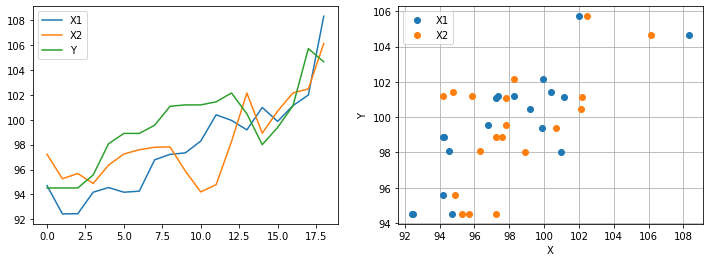

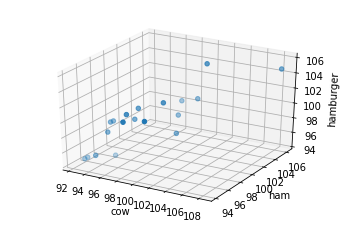

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_train[:,0], label='X1')
plt.plot(x_train[:,1], label='X2')
#plt.plot(x_train[:,2], label='X3')
plt.plot(y_train, label='Y')
plt.legend()

plt.subplot(122)
plt.plot(x_train[:,0], y_train, 'o', label='X1')
plt.plot(x_train[:,1], y_train, 'o', label='X2') # 그래프 그리기
#plt.plot(x_train[:,2], y_train, 'o', label='X3')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train)
ax.set_xlabel('cow')
ax.set_ylabel('ham')
ax.set_zlabel('hamburger')
ax.dist=11
plt.show()

In [12]:
## statsmodels 
import statsmodels.api as sm # 계량경제학의 방법

X_const = sm.add_constant(x_train)# 상수항을 포함하라
olsmod = sm.OLS(y_train, X_const)# ols 지정
olsres = olsmod.fit() # ols 돌려라
print(olsres.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     14.84
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           0.000227
Time:                        13:47:27   Log-Likelihood:                -38.508
No. Observations:                  19   AIC:                             83.02
Df Residuals:                      16   BIC:                             85.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0018     14.509      2.688      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [13]:
## 1. naive approach
W = tf.Variable(tf.random.normal([2,1], mean=0.0)) # [2,1] 행렬
b = tf.Variable(tf.random.normal([1], mean=0.0)) # 벡터

def hypothesis(X):
    return tf.matmul(X, W) + b

def cost(H, Y):
    return tf.reduce_mean(tf.square(H - Y))

learning_rate = 0.00001
optimizer = tf.optimizers.SGD(learning_rate)
loss_record = []
def train(X, Y):
    with tf.GradientTape() as g: # g에 미분 적용 클래스를 적용
        pred = hypothesis(X)  # 가설직선 x를 pred 로 설정
        loss = cost(pred, Y)  # cost함수에 넣음
        loss_record.append(loss.numpy())
    gradients = g.gradient(loss, [W, b]) # dloss/dW, dloss/db       
    optimizer.apply_gradients(zip(gradients, [W, b])) # W : W - a*dcost/dW

for step in range(20001):
    train(x_train, y_train)
    if step % 5000 == 0:
        pred = hypothesis(x_train)  # make prediction
        loss = cost(pred, y_train)  # calculate loss
        print("%s \t cost = %s" % (step, loss.numpy()))
    
print('*'*50)
print(f'y = {W.numpy()}x + {b.numpy()}')

0 	 cost = 6234.149
5000 	 cost = 12.6440325
10000 	 cost = 8.997113
15000 	 cost = 7.0687623
20000 	 cost = 6.049058
**************************************************
y = [[0.29034114]
 [0.7254357 ]]x + [-0.12300383]


No handles with labels found to put in legend.


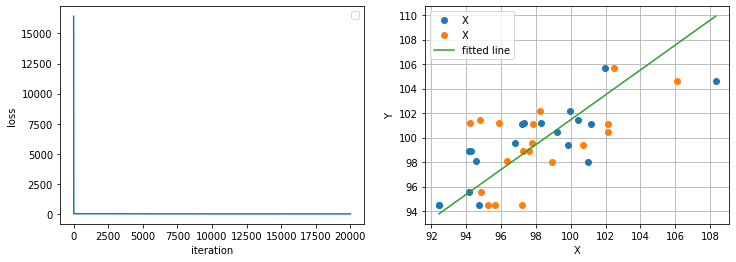

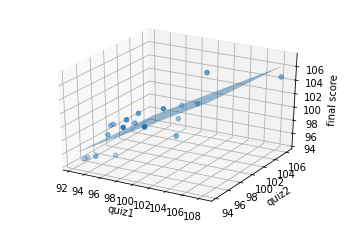

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(loss_record)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()

w_hat, b_hat = W.numpy(), b.numpy()
xx           = np.linspace(x_train.min(), x_train.max(), 25) #min,max,개수
fitting_line = b_hat  + w_hat[0]*xx + w_hat[1]*xx  # + w_hat[2]*xx

plt.subplot(122)
plt.plot(x_train, y_train, 'o', label='X')
plt.plot(xx, fitting_line, label='fitted line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

XX = np.hstack([np.ones((len(y_train), 1)), x_train])  #(75,3)
theta = np.linalg.solve(np.dot(XX.T, XX), np.dot(XX.T, y_train))  
pred = np.dot(XX, theta)

xx, yy, zz = np.meshgrid(XX[:,0], XX[:,1], XX[:,2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T 
Z = combinedArrays.dot(theta) 

ax = plt.axes(projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train)
ax.plot_trisurf(combinedArrays[:, 1], combinedArrays[:, 2], Z.flatten(), alpha=0.5)
ax.set_xlabel('quiz1')
ax.set_ylabel('quiz2')
ax.set_zlabel('final score')
ax.dist=11
plt.show()

# 데이터를 순서대로 배열하는 것이 중요함. 그렇지 않으면 이상한 그래프가 나옴

In [15]:
# performance(모형 성과 평가)
from sklearn.metrics import r2_score, mean_squared_error
y_pred = hypothesis(x_train)

R2 = r2_score(y_train, y_pred)
print(R2)

mse = mean_squared_error(y_train, y_pred)
print(mse)

0.3717014546790435
6.049058


In [16]:
#(7) prediction
x_test = np.array([[100., 100.]], dtype=np.float32) #, 101.
x_test_predict = np.dot(x_test, W.numpy()) + b.numpy()
x_test_predict = hypothesis(x_test)
print("Your score will be\n ", x_test_predict.numpy())  
print("*"*50)

x_test = np.array([[100., 100.],     #, 101.
                   [100., 100.]], dtype=np.float32) #, 80.
x_test_predict = np.dot(x_test,W.numpy()) + b.numpy()
x_test_predict = hypothesis(x_test)
print("Your score will be\n ", x_test_predict.numpy())  

Your score will be
  [[101.45468]]
**************************************************
Your score will be
  [[101.45468]
 [101.45468]]


In [17]:
## 2. keras approach
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='linear')) # input_shape=(2,)
model.compile(loss = 'mse', optimizer='sgd') # learning_rate=0.01 default가 0.01 이다.
#model.summary()

history = model.fit(x_train, y_train, epochs=5, verbose=1)

w_hat, b_hat = model.get_weights()
print("weights = \n", w_hat)
print("bias = \n", b_hat)

Epoch 1/5
1/1 [==============================] - 0s 416ms/step - loss: 555.6468
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 80945112.0000
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11908141809664.0000
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 1751852288852361216.0000
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 257721677224812811911168.0000
weights = 
 [[-9.911227e+11]
 [-9.947044e+11]]
bias = 
 [-1.0121186e+10]


In [18]:
from tensorflow.keras.optimizers import SGD 
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='linear')) # input_shape=(2,) y 한개 x 두개
model.compile(loss = 'mse', optimizer = SGD(learning_rate=0.00001))
#model.summary()

history = model.fit(x_train, y_train, epochs=5001, verbose=0)

w_hat, b_hat = model.get_weights()
print("weights = \n", w_hat)
print("bias = \n", b_hat)

weights = 
 [[0.5501577 ]
 [0.46514225]]
bias = 
 [0.01580264]


In [19]:
# performance(모형 성과 평가): 
from sklearn.metrics import r2_score, mean_squared_error
y_pred = hypothesis(x_train)

R2 = r2_score(y_train, y_pred)
print(R2)

mse = mean_squared_error(y_train, y_pred)
print(mse)

0.3717014546790435
6.049058


In [20]:
x_new = np.array([[100., 70.]]) #.reshape(-1,1)
ypred = model.predict(x_new) #.reshape(-1,1)
print("Your score will be\n ", ypred)
print("*"*50)

x_new = np.array([[100., 70.],
                  [90., 100.]])
ypred = model.predict(x_new) #.reshape(-1,1)
print("Your score will be\n ", ypred)

Your score will be
  [[87.59153]]
**************************************************
Your score will be
  [[87.59153]
 [96.04422]]
